In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
# from census import Census
from us import states
import json

#pip istall only needs to be ran once then this code can be removed
!pip install -U epiweeks
import epiweeks as ew

# Census API Key
from config import api_key
# c = Census(api_key)
c = api_key

Requirement already up-to-date: epiweeks in c:\users\superpawn\anaconda3\lib\site-packages (2.1.2)


In [9]:
#Disease CSV data: issues are traslating 'epiweek' column into a year, data frame will need to be shortened to only inlude years 2005-2010

disease_df = pd.read_csv("diseases_us_1916_to_2011.csv")

disease_df.dtypes

epi_week                  int64
state                    object
loc                      object
loc_type                 object
disease                  object
cases                    object
incidence_per_100000    float64
dtype: object

In [10]:
disease_df["cases"]=disease_df["cases"].astype(str).replace("\\N",np.nan)
disease_df=disease_df.dropna(how="any")
disease_df['cases'] = disease_df["cases"].astype(int)

In [11]:
#Convert epi_week column into week and years columns.
disease_df['epi_week'] = disease_df['epi_week'].astype(str)
disease_df['year'] = disease_df['epi_week'].str[0:4]
disease_df['week'] = disease_df['epi_week'].str[4:6]
disease_df

,epi_week,state,loc,loc_type,disease,cases,incidence_per_100000,year,week
0,196601,MN,MINNESOTA,STATE,HEPATITIS A,3,0.08,1966,01
1,196601,CO,COLORADO,STATE,HEPATITIS A,1,0.05,1966,01
2,196601,AZ,ARIZONA,STATE,HEPATITIS A,6,0.37,1966,01
3,196601,MT,MONTANA,STATE,HEPATITIS A,2,0.28,1966,01
4,196601,LA,LOUISIANA,STATE,HEPATITIS A,1,0.03,1966,01
...,...,...,...,...,...,...,...,...,...
759462,194752,WI,SUPERIOR,CITY,DIPHTHERIA,0,0.00,1947,52
759463,194752,FL,TAMPA,CITY,DIPHTHERIA,0,0.00,1947,52
759464,194752,CO,DENVER,CITY,DIPHTHERIA,1,0.25,1947,52
759465,194752,NY,BUFFALO,CITY,DIPHTHERIA,2,0.35,1947,52


In [12]:
short_disease_df = disease_df.loc[(disease_df['year']== '2010')|(disease_df['year']== '2009')|(disease_df['year']== '2008')|(disease_df['year']== '2007')|(disease_df['year']== '2006')]

grouped_disease_df = short_disease_df.groupby(['year','state','disease',])
clean_disease_df=pd.DataFrame(grouped_disease_df['cases'].sum())
clean_disease_df

cases
year state disease           
2006 AK    PERTUSSIS       53
     AL    HEPATITIS A     17
           PERTUSSIS       90
     AR    HEPATITIS A     23
           PERTUSSIS       60
...                       ...
2010 WI    PERTUSSIS      304
     WV    HEPATITIS A      9
           PERTUSSIS       91
     WY    HEPATITIS A      3
           PERTUSSIS        6

[503 rows x 1 columns]

In [13]:
years=['2006','2007','2008','2009','2010']
All_data= {}
for year in years:
    try:
        target_url = f"https://api.census.gov/data/{year}/acs/acs1?get=NAME,B01003_001E,B19013_001E&for=state:*&key={api_key}"
        income_data = requests.get(target_url).json()
        All_data.update({year:income_data})
    except:
        print ('not found')
        
All_data

{'2006': [['NAME', 'B01003_001E', 'B19013_001E', 'state'],
  ['Alabama', '4599030', '38783', '01'],
  ['Alaska', '670053', '59393', '02'],
  ['Arizona', '6166318', '47265', '04'],
  ['Arkansas', '2810872', '36599', '05'],
  ['California', '36457549', '56645', '06'],
  ['Colorado', '4753377', '52015', '08'],
  ['Connecticut', '3504809', '63422', '09'],
  ['Delaware', '853476', '52833', '10'],
  ['District of Columbia', '581530', '51847', '11'],
  ['Florida', '18089889', '45495', '12'],
  ['Georgia', '9363941', '46832', '13'],
  ['Hawaii', '1285498', '61160', '15'],
  ['Idaho', '1466465', '42865', '16'],
  ['Illinois', '12831970', '52006', '17'],
  ['Indiana', '6313520', '45394', '18'],
  ['Iowa', '2982085', '44491', '19'],
  ['Kansas', '2764075', '45478', '20'],
  ['Kentucky', '4206074', '39372', '21'],
  ['Louisiana', '4287768', '39337', '22'],
  ['Maine', '1321574', '43439', '23'],
  ['Maryland', '5615727', '65144', '24'],
  ['Massachusetts', '6437193', '59963', '25'],
  ['Michigan', 

In [14]:
#reading the census Json data into a dataframe. issues include translating the state names into state abreviations to match the disease data frame, dropping the frst row, and renaming the columns
# income_df = pd.DataFrame(All_data)

income_df= pd.DataFrame()
years=['2006','2007','2008','2009','2010']
for year in years:
    df= pd.DataFrame(All_data[year])
    df['year']=year
    df.drop(index=df.index[0],axis=0,inplace=True)
    income_df=pd.concat([income_df,df])
income_df.columns= ['state', 'population', 'household income', 'state num', 'year']
income_df

,state,population,household income,state num,year
1,Alabama,4599030,38783,01,2006
2,Alaska,670053,59393,02,2006
3,Arizona,6166318,47265,04,2006
4,Arkansas,2810872,36599,05,2006
5,California,36457549,56645,06,2006
...,...,...,...,...,...
48,Washington,6744496,55631,53,2010
49,West Virginia,1853973,38218,54,2010
50,Wisconsin,5691047,49001,55,2010
51,Wyoming,564460,53512,56,2010


In [15]:
income_df = income_df.replace({
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
})

In [16]:
df_merged= pd.merge(disease_df,income_df,on=['state','year'],how='inner') 
df_merged['population'] = df_merged['population'].astype(int)
df_merged['household income'] = df_merged['household income'].astype(int)
df_merged

,epi_week,state,loc,loc_type,disease,cases,incidence_per_100000,year,week,population,household income,state num
0,200601,OH,OHIO,STATE,HEPATITIS A,1,0.01,2006,01,11478006,44532,39
1,200602,OH,OHIO,STATE,HEPATITIS A,3,0.03,2006,02,11478006,44532,39
2,200603,OH,OHIO,STATE,HEPATITIS A,2,0.02,2006,03,11478006,44532,39
3,200604,OH,OHIO,STATE,HEPATITIS A,0,0.00,2006,04,11478006,44532,39
4,200605,OH,OHIO,STATE,HEPATITIS A,2,0.02,2006,05,11478006,44532,39
...,...,...,...,...,...,...,...,...,...,...,...,...
22495,201048,VT,VERMONT,STATE,PERTUSSIS,2,0.32,2010,48,625960,49406,50
22496,201049,VT,VERMONT,STATE,PERTUSSIS,1,0.16,2010,49,625960,49406,50
22497,201050,VT,VERMONT,STATE,PERTUSSIS,1,0.16,2010,50,625960,49406,50
22498,201051,VT,VERMONT,STATE,PERTUSSIS,0,0.00,2010,51,625960,49406,50


In [17]:
grouped_df = df_merged.groupby(['year','state','disease'])
grouped_df=pd.DataFrame(grouped_df.agg({'cases': 'sum', 'population': 'mean', 'household income':'mean'}))
grouped_df=grouped_df.reset_index()

grouped_df


,year,state,disease,cases,population,household income
0,2006,AK,PERTUSSIS,53,670053,59393
1,2006,AL,HEPATITIS A,17,4599030,38783
2,2006,AL,PERTUSSIS,90,4599030,38783
3,2006,AR,HEPATITIS A,23,2810872,36599
4,2006,AR,PERTUSSIS,60,2810872,36599
...,...,...,...,...,...,...
498,2010,WI,PERTUSSIS,304,5691047,49001
499,2010,WV,HEPATITIS A,9,1853973,38218
500,2010,WV,PERTUSSIS,91,1853973,38218
501,2010,WY,HEPATITIS A,3,564460,53512


Text(0, 0.5, 'Total Number of Cases 2006-2010')

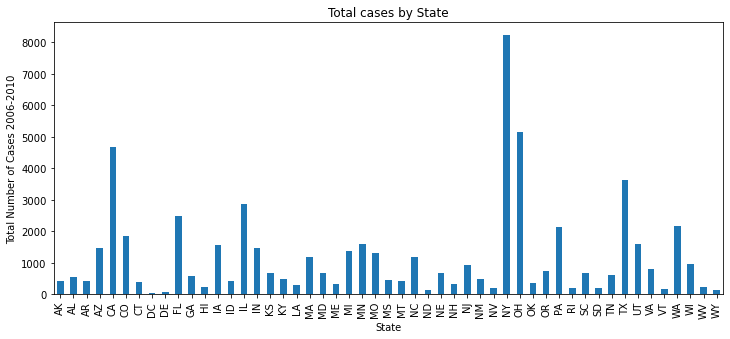

In [18]:
#disease cases by state

state_group=grouped_df.groupby(['state'])
disease_by_state = state_group['cases'].sum()
# avg_state_population = state_group['population'].mean()
# print(disease_by_state)

state_disease_chart = disease_by_state.plot(kind='bar', title='Total cases by State', figsize=(12,5))
# chart = workbook.add_chart({'type': 'column', 'subtype': 'stacked'})
state_disease_chart.set_xlabel("State")
state_disease_chart.set_ylabel("Total Number of Cases 2006-2010")



Text(0, 0.5, 'Number of Cases Per Capita 2006-2010')

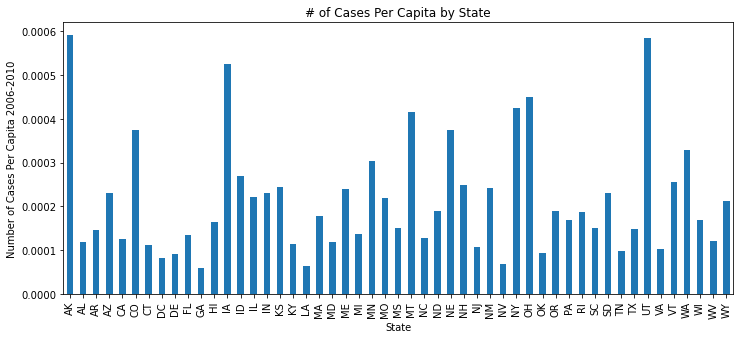

In [19]:
#disease cases per capita by state 2006-2010

state_group=grouped_df.groupby(['state'])
disease_by_state = state_group['cases'].sum()
avg_state_population = state_group['population'].mean()
per_capita = disease_by_state/ avg_state_population
# print(disease_by_state)

state_disease_chart = per_capita.plot(kind='bar', title='# of Cases Per Capita by State', figsize=(12,5))
# chart = workbook.add_chart({'type': 'column', 'subtype': 'stacked'})
state_disease_chart.set_xlabel("State")
state_disease_chart.set_ylabel("Number of Cases Per Capita 2006-2010")

Text(0, 0.5, 'Avg Household Income')

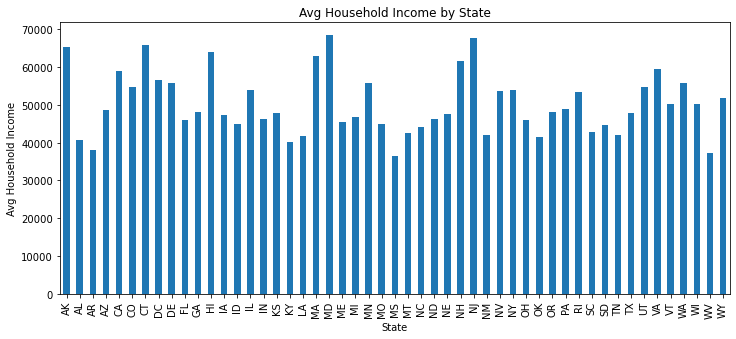

In [25]:
# avg income by state

state_group=grouped_df.groupby(['state'])
income_by_state = state_group['household income'].mean()


state_disease_chart = income_by_state.plot(kind='bar', title='Avg Household Income by State', figsize=(12,5))
state_disease_chart.set_xlabel("State")
state_disease_chart.set_ylabel("Avg Household Income")

The correlation between both factors is 0.05


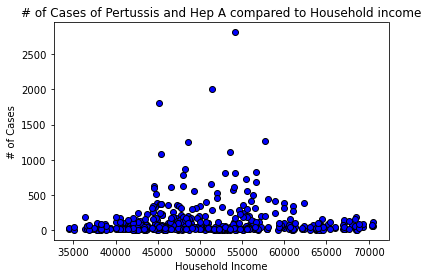

In [27]:
# cases per capita compared to income for both diseases

cases = grouped_df['cases']
income = grouped_df['household income']
plt.scatter(income,cases, marker="o", facecolors="blue", edgecolors="black")

correlation = st.pearsonr(income,cases)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.title("# of Cases of Pertussis and Hep A compared to Household income")
plt.xlabel('Household Income')
plt.ylabel('# of Cases')
plt.show()

The correlation between both factors is 0.02


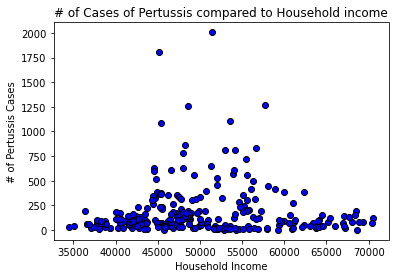

In [22]:
# cases compared to income for Pertussis

pertuss_df = grouped_df.loc[grouped_df['disease']== 'PERTUSSIS']
pertuss_cases = pertuss_df['cases']
pertuss_income = pertuss_df['household income']
plt.scatter(pertuss_income,pertuss_cases, marker="o", facecolors="blue", edgecolors="black")

correlation = st.pearsonr(pertuss_income,pertuss_cases)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.title("# of Cases of Pertussis compared to Household income")
plt.xlabel('Household Income')
plt.ylabel('# of Pertussis Cases')
plt.show()

The correlation between both factors is 0.08


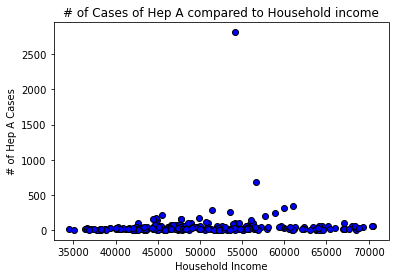

In [23]:
# cases compared to income for Hep A

hep_df = grouped_df.loc[grouped_df['disease']== 'HEPATITIS A']
hep_cases = hep_df['cases']
hep_income = hep_df['household income']
plt.scatter(hep_income,hep_cases, marker="o", facecolors="blue", edgecolors="black")

correlation = st.pearsonr(hep_income,hep_cases)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.title("# of Cases of Hep A compared to Household income")
plt.xlabel('Household Income')
plt.ylabel('# of Hep A Cases')
plt.show()